In [ ]:
# import utils
from utils1 import *

In [ ]:
# Load the MNIST dataset using the datasets.MNIST function
trainset = datasets.MNIST("./MNIST_data", download=True, train=True, transform=transform)

In [ ]:
# This is the total length of the available trainset
total_length = len(trainset)
print(total_length)

60000


In [ ]:
split_size = total_length // 3

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split the training dataset into three datasets for this example
part1, part2, part3 = random_split(trainset, [split_size] * 3)

In [ ]:
# We intentionally excluded some digits in each part
part1 = exclude_digits(part1, excluded_digits=[1,3,7])
part2 = exclude_digits(part2, excluded_digits=[2,5,8])
part3 = exclude_digits(part3, excluded_digits=[4,6,9])

trainsets = [part1, part2, part3]


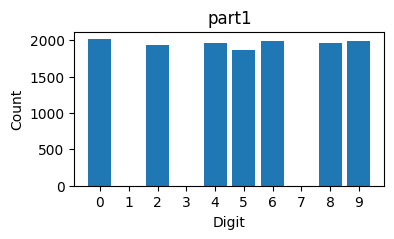

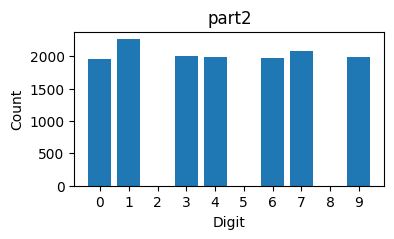

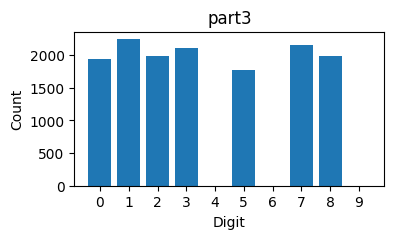

In [ ]:
# Shows the distribution graph
plot_distribution(part1, "part1")
plot_distribution(part2, "part2")
plot_distribution(part3, "part3")

In [ ]:
# Initialise our model and train the model with each part
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065381924080294
Epoch 2: Loss = 0.24500494069138237
Epoch 3: Loss = 0.19132229994202768
Epoch 4: Loss = 0.15808402004456798
Epoch 5: Loss = 0.1316791181734135
Epoch 6: Loss = 0.11012905750770209
Epoch 7: Loss = 0.09581515690268472
Epoch 8: Loss = 0.08408397637567548
Epoch 9: Loss = 0.07073350762731807
Epoch 10: Loss = 0.06051710451584916
Training complete
Epoch 1: Loss = 0.3983497630272593
Epoch 2: Loss = 0.18235595755478634
Epoch 3: Loss = 0.16427662728321074
Epoch 4: Loss = 0.1346918940211513
Epoch 5: Loss = 0.12097253573925368
Epoch 6: Loss = 0.09941595551624362
Epoch 7: Loss = 0.09128516389215033
Epoch 8: Loss = 0.08089328429819684
Epoch 9: Loss = 0.07205460202905149
Epoch 10: Loss = 0.06480233806152162
Training complete
Epoch 1: Loss = 0.5017053610099865
Epoch 2: Loss = 0.26498566799469897
Epoch 3: Loss = 0.20764533854886755
Epoch 4: Loss = 0.164857519555602
Epoch 5: Loss = 0.13950552980977673
Epoch 6: Loss = 0.12056633046417085
Epoch 7: Loss = 0.100745776693361

In [ ]:
# Load the testset
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

In [ ]:
# We specified testsets that included the missing digits in each partbn9087
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

In [ ]:
# The evaluate_model function is called to evaluate each model defined above (model1, model2, model3) on both, the entire test dataset and specific subsets of the test dataset.
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy_on_137:.4f}"
)
_, accuracy2 = evaluate_model(model2, testset)
_, accuracy_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy_on_258:.4f}"
)
_, accuracy3 = evaluate_model(model3, testset)
_, accuracy_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6574, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6878, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6842, Test Accuracy on [4,6,9]: 0.0000


In [ ]:
# Analyze the results looking at the 'confusion matrix' for the three models just trained using the compute_confusion_matrix.
confusion_matrix_model1 = compute_confusion_matrix(model1, testset)
confusion_matrix_model2 = compute_confusion_matrix(model2, testset)
confusion_matrix_model3 = compute_confusion_matrix(model3, testset)


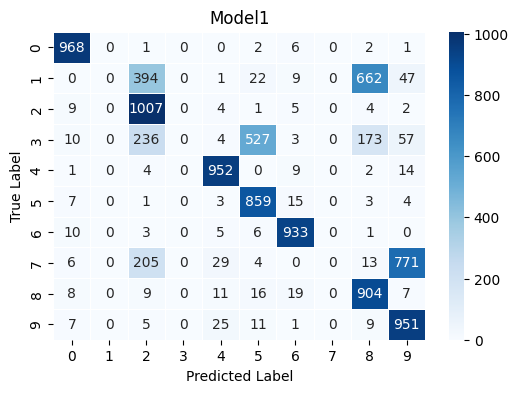

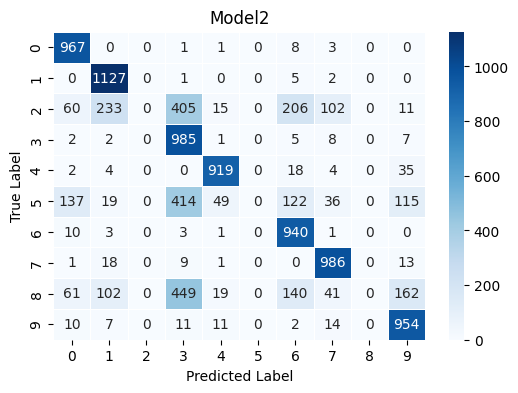

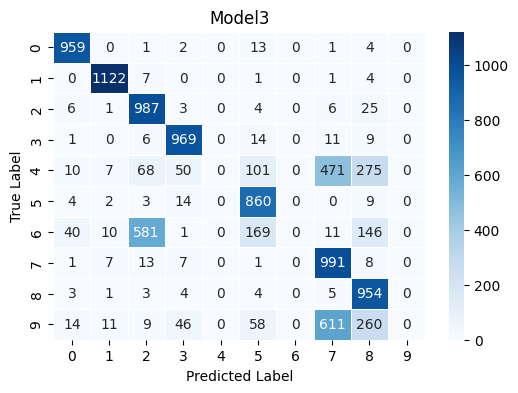

In [ ]:
plot_confusion_matrix(confusion_matrix_model1, "Model1")
plot_confusion_matrix(confusion_matrix_model2, "Model2")
plot_confusion_matrix(confusion_matrix_model3, "Model3")
